In [9]:
# 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
# Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату 
# (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
# Произвести расчет как с использованием intercept, так и без.

import numpy as np

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  # Признак - зарплата заемщиков банка (zp)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])  # Целевая переменная - значение кредитного скоринга (ks)



$$y = a + bx;\ \ \ \ \ b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};\ \ \ \ a = \overline{y} - b \cdot {\overline{x}}.$$

In [4]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
print(f'С использованием intercept: y = {round(a,2)} + {round(b,2)} * x')

С использованием intercept: y = 444.18 + 2.62 * x


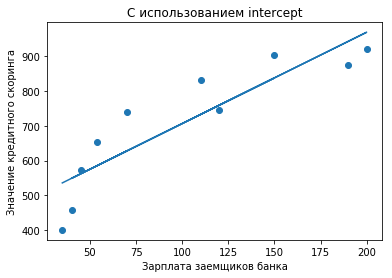

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)
plt.plot(x, a + b * x)
plt.xlabel('Зарплата заемщиков банка')
plt.ylabel('Значение кредитного скоринга')
plt.title('С использованием intercept')
plt.show()

In [6]:
# Для расчета без intercept используем матричный метод

xm = x.reshape((10, 1))
ym = y.reshape((10, 1))

# y = b0 + b1 * x
# Т.к. без intercept, то b0=0

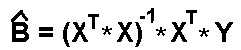

In [7]:
bm = np.dot(np.linalg.inv(np.dot(xm.T, xm)), xm.T @ ym)
print(f'Без использования intercept: y = {round(bm[0][0], 2)} * x')

Без использования intercept: y = 5.89 * x


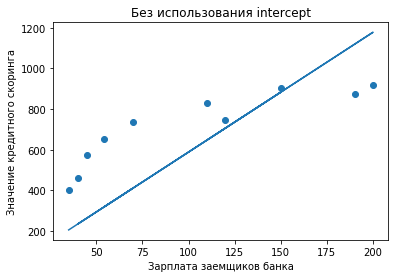

In [8]:
plt.scatter(x, y)
plt.plot(x, bm[0][0] * x)
plt.xlabel('Зарплата заемщиков банка')
plt.ylabel('Значение кредитного скоринга')
plt.title('Без использования intercept')
plt.show()

In [10]:
# 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

# Градиентный спуск

# Среднеквадратичная ошибка
def mse_(B1_coef, y_arr, x_arr, n):
    y_hat = B1_coef * x_arr  # наша оценочная функция (без intercept)
    return np.sum((y_hat - y_arr) ** 2) / n

# Производная по B1 от среднеквадратичной ошибки
def mse_p(B1_coef, y_arr, x_arr, n):
    y_hat = B1_coef * x_arr  # наша оценочная функция (без intercept)
    return (2/n) * np.sum((y_hat - y_arr) * x_arr)

alpha = 1e-6  # коэффициент скорости спуска
B1 = 0.1  # начальное значение искомого коэффициента
n = 10

for i in range (1000):
    B1 -= alpha * mse_p(B1, y, x, n)
    if i%100 == 0:
        print(f'Итерация {i}, B1={B1}, mse={mse_(B1, x, y, n)}')
        
print(f'-----------\nИспользуя градиентный спуск (без intercept): y = {round(B1, 2)} * x')

Итерация 0, B1=0.25952808000000005, mse=7655.730737357037
Итерация 100, B1=5.54537842245223, mse=15548133.898862962
Итерация 200, B1=5.868748638669329, mse=17468219.948663205
Итерация 300, B1=5.888531320728348, mse=17589312.184377924
Итерация 400, B1=5.8897415574471985, mse=17596733.770397563
Итерация 500, B1=5.889815595583751, mse=17597187.848422274
Итерация 600, B1=5.889820124983314, mse=17597215.627550483
Итерация 700, B1=5.889820402076462, mse=17597217.326983087
Итерация 800, B1=5.88982041902807, mse=17597217.430948544
Итерация 900, B1=5.889820420065112, mse=17597217.437308796
-----------
Используя градиентный спуск (без intercept): y = 5.89 * x


In [1]:
# 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица 
# значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Распределение Стьюдента используется (t-критерии Стьюдента) для оценки статистической значимости разности двух выборочных средних, при построении доверительного интервала для математического ожидания нормальной совокупности при неизвестной дисперсии.

Для оценки математического ожидания нормального распределения по малым выборкам и неизвестном std(x) следует пользоваться t – распределением Стьюдента.

Таблица значений функции Лапласа используется при известной дисперсии генеральной выборки.

In [15]:
# *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно 
# производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого 
# во время одной итерации).

# Среднеквадратичная ошибка
def mse_(B0_coef, B1_coef, y_arr, x_arr, n):
    y_hat = B0_coef + B1_coef * x_arr  # наша оценочная функция (с intercept)
    return np.sum((y_hat - y_arr) ** 2) / n

# Производная по B1 от среднеквадратичной ошибки
def mse_p_B1(B0_coef, B1_coef, y_arr, x_arr, n):
    y_hat = B0_coef + B1_coef * x_arr  # наша оценочная функция (с intercept)
    return (2/n) * np.sum((y_hat - y_arr) * x_arr)

# Производная по B0 от среднеквадратичной ошибки
def mse_p_B0(B0_coef, B1_coef, y_arr, x_arr, n):
    y_hat = B0_coef + B1_coef * x_arr  # наша оценочная функция (с intercept)
    return (2/n) * np.sum((y_hat - y_arr))

alpha = 5e-5  # коэффициент скорости спуска
B0 = 0.1  # начальное значение искомого коэффициента
B1 = 0.1  # начальное значение искомого коэффициента
n = 10

for i in range (1500001):
    B0 -= alpha * mse_p_B0(B0, B1, y, x, n)
    B1 -= alpha * mse_p_B1(B0, B1, y, x, n)
    if i%100000 == 0:
        print(f'Итерация {i}, B0={B0}, B1={B1}, mse={mse_(B0, B1, x, y, n)}')
        
print(f'-----------\nИспользуя градиентный спуск (с intercept): y = {round(B0, 2)} + {round(B1, 2)} * x')

Итерация 0, B0=0.169966, B1=8.074680544760001, mse=33550186.980072826
Итерация 100000, B0=409.0442373734796, B1=2.879127619051743, mse=5733055.493311295
Итерация 200000, B0=441.3974680483413, B1=2.6409995775222037, mse=5073169.567267399
Итерация 300000, B0=443.95740007610897, B1=2.622157823932053, mse=5022699.409945211
Итерация 400000, B0=444.159953325044, B1=2.6206669802831115, mse=5018716.897944815
Итерация 500000, B0=444.1759802422447, B1=2.6205490180788695, mse=5018401.8521358315
Итерация 600000, B0=444.17724836347435, B1=2.6205396843827113, mse=5018376.924732838
Итерация 700000, B0=444.17734870288626, B1=2.6205389458590114, mse=5018374.952368131
Итерация 800000, B0=444.1773566421911, B1=2.6205388874236997, mse=5018374.796305793
Итерация 900000, B0=444.177357270376, B1=2.6205388828000986, mse=5018374.78395761
Итерация 1000000, B0=444.17735732000267, B1=2.620538882434834, mse=5018374.782982102
Итерация 1100000, B0=444.17735732323916, B1=2.620538882411012, mse=5018374.782918481
Итера